# Read Pre-processed Image from numpy files.
## Color images
A data verification notebook to visualize image data on numpy format

In [1]:
from os import path
import sys
import random
import math

import warnings
warnings.filterwarnings('ignore')

import SimpleITK as sitk
import numpy as np
import skimage.io
import matplotlib
import matplotlib.pyplot as plt
import cv2

from keras.utils import print_summary
# Add the ptdraft folder path to the sys.path list
sys.path.append('../')

import segcapsnet.capsnet as modellib
from utils.data_helper import *
from test import *
from utils.load_2D_data import *
from PIL import Image

%matplotlib inline 

# Root directory of the project
ROOT_DIR = path.dirname("../")
DATA_DIR = path.join(ROOT_DIR, "data")

# Directory to save logs and trained model
# MODEL_DIR = path.join(DATA_DIR, "saved_models/segcapsr3/m1.hdf5") # LUNA16

# Local path to trained weights file
# COCO_MODEL_PATH = path.join(DATA_DIR, "saved_models/segcapsr3/dice.hdf5") # MSCOCO17

# Directory of images to run detection on
IMAGE_DIR = path.join(DATA_DIR, "imgs")
MASKS_DIR = path.join(DATA_DIR, "masks")

Using TensorFlow backend.


### Read image data from numpy files

In [2]:
train_list = [['train2.png']]

for i, scan_name in enumerate(train_list):
    try:
        scan_name = scan_name[0]
        path_to_np = join(DATA_DIR,'np_files',basename(scan_name)[:-3]+'npz')
        with np.load(path_to_np) as data:        
            print('np.load')
            train_img = data['img']
            train_mask = data['mask']
            for j, r in enumerate(train_mask):
                l = list()
                for e in r:
                    l.extend(e)
                print(j)
                print(l)
    except IOError as e:
        print ("\nOops!  That was IO Error.  Try again...")            
        print(e.errno)
        print(e)        
    except ValueError:
        print ("\nOops!  That was no valid number.  Try again...")  
    except Exception as e:
        print('\nException: %s'%(e))
        print('\nPre-made numpy array not found for {}.\nCreating now...'.format(scan_name[:-4]))

np.load
0
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

232
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

### Original image


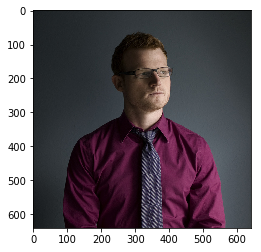

In [3]:

img_data = np.array(Image.open(join(IMAGE_DIR, train_list[0][0])))
plt.imshow(img_data)

### Output mask

(512, 512, 1)


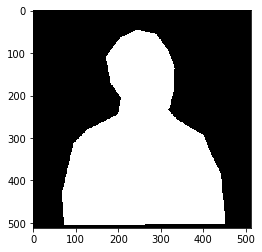

In [4]:
from datetime import datetime
IMAGE_SIZE = 512
print(train_mask.shape)
plt.imshow(train_mask[:,:,0], cmap='gray')


## Input Color Image in numpy files.

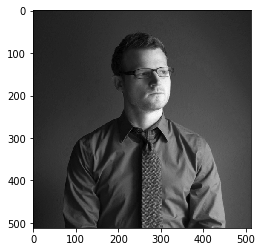

In [7]:
plt.imshow(train_img[:,:,0], cmap='gray')

In [8]:
print(train_img)

[[[0.12947322]
  [0.12947322]
  [0.12163008]
  ...
  [0.14515937]
  [0.14515937]
  [0.1412378 ]]

 [[0.12555165]
  [0.12947322]
  [0.12947322]
  ...
  [0.1412378 ]
  [0.1412378 ]
  [0.1412378 ]]

 [[0.12947322]
  [0.13339479]
  [0.12947322]
  ...
  [0.1412378 ]
  [0.1412378 ]
  [0.1412378 ]]

 ...

 [[0.10986525]
  [0.11375625]
  [0.12158407]
  ...
  [0.25110312]
  [0.25500943]
  [0.26283725]]

 [[0.10986525]
  [0.1137715 ]
  [0.1137715 ]
  ...
  [0.25500937]
  [0.25500943]
  [0.25893094]]

 [[0.10205269]
  [0.10984994]
  [0.11375625]
  ...
  [0.25890036]
  [0.25500937]
  [0.24329056]]]
